# Resumo


Neste projeto será feita uma análise exploratória de um conjunto de dados de uma empresa de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Será criado um modelo que preveja se a pessoa clicará ou não em um anúncio baseado nos recursos desse usuário.


In [13]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Visão geral do dataset

In [14]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Informações adicionais

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


***
# Traduzindo colunas

In [16]:
df.columns = ['minutos no site', 'idade', 'renda anual',
       'minutos de navegacao por dia', 'titulo do anuncio', 'cidade do cliente', 'sexo', 'nacionalidade',
       'horario que saiu da internet', 'clicou no anuncio']

In [17]:
df.head()

,minutos no site,idade,renda anual,minutos de navegacao por dia,titulo do anuncio,cidade do cliente,sexo,nacionalidade,horario que saiu da internet,clicou no anuncio
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Visualizando distribuição de idade dos clientes

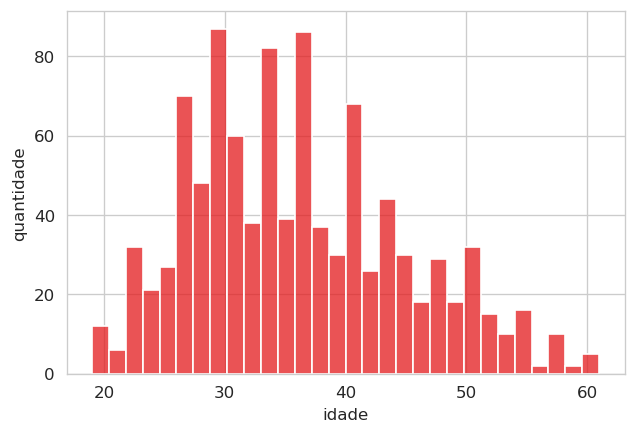

In [18]:
sns.set_style("whitegrid")
plt.figure(dpi=120)
sns.set_palette("Set1")
plt.ylabel("quantidade")
sns.histplot(data=df, x='idade',bins=30)
plt.show()

Obs: A maioria dos cliente estão abaixo dos 40 anos
***


# Visualizando quem clicou baseado na renda dos clientes e na idade

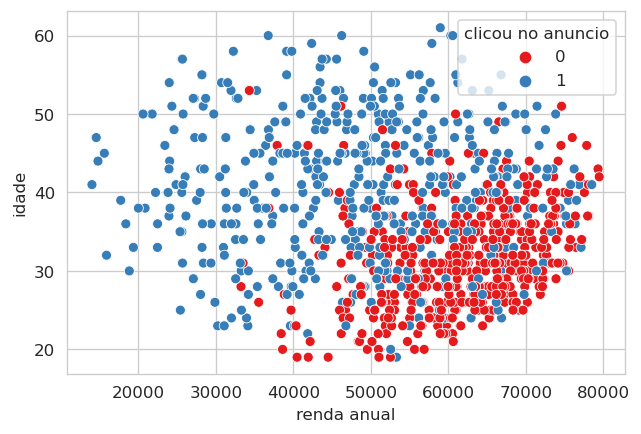

In [19]:
plt.figure(dpi=120)
sns.set_palette("Set1")
sns.scatterplot(x='renda anual',hue="clicou no anuncio", y='idade', data=df)
plt.show()

Obs: Observamos que as pessoas com uma maior renda são as que menos clicam nos anúncios
***

# Visualizando quantidade de tempo em minutos que o cliente passa por dia **na internet** por idade

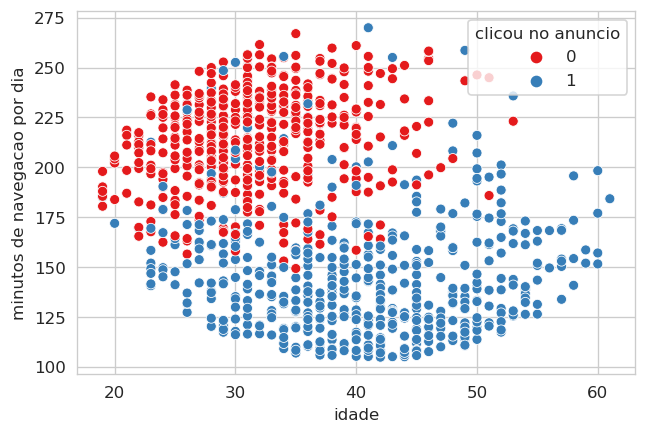

In [20]:
sns.set_palette("Set1")
plt.figure(dpi=120)
sns.scatterplot(x='idade', hue="clicou no anuncio", y='minutos de navegacao por dia', data=df)
plt.show()

Curiosamente as pessoas que mais passam tempo na internet, são as que menos clicam nos anúncios
***

# Visualizando quantidade de tempo em minutos que o cliente passa por dia **no site** por idade

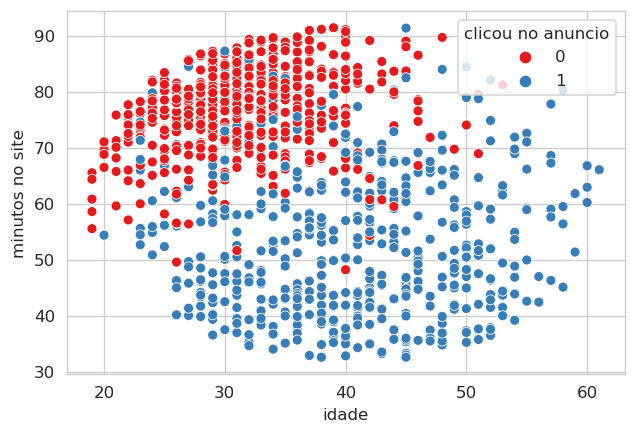

In [21]:
sns.set_palette("Set1")
plt.figure(dpi=120)
sns.scatterplot(x='idade', hue="clicou no anuncio", y='minutos no site', data=df)
plt.show()

***
# Verificando os tipos de anúncios mais clicados

In [22]:
df["titulo do anuncio"].value_counts()

Cross-group neutral synergy                    1
Pre-emptive neutral contingency                1
Optimized coherent Internet solution           1
User-friendly upward-trending intranet         1
Front-line multi-state hub                     1
                                              ..
Exclusive multi-state Internet solution        1
Customizable executive software                1
Enterprise-wide bi-directional secured line    1
Streamlined exuding adapter                    1
Organized upward-trending contingency          1
Name: titulo do anuncio, Length: 1000, dtype: int64

Os anúncios nao se repetem com frequencia
***

# Agrupamentos

### Agrupando media de minutos que o cliente passa no site por sexo


In [23]:
df[['minutos no site','sexo']].groupby('sexo').mean().sort_values(by='minutos no site',ascending=False)

,minutos no site
sexo,
0,65.289287
1,64.688274


Obs: foi observado que tanto mulheres(0) quanto homens(1) passam em media 65 minutos no site
***

### Agrupando media de minutos que os clientes passam navegando na internet por sexo

In [24]:
df[['minutos de navegacao por dia','sexo']].groupby('sexo').mean().sort_values(by='minutos de navegacao por dia',ascending=False)

,minutos de navegacao por dia
sexo,
1,181.276923
0,178.816763


Obs: Clientes homens passam um pouco mais de tempo na internet que as mulheres
***

### Agrupando media de clientes que clicaram nos anuncios por sexo

In [25]:
df[['clicou no anuncio','sexo']].groupby('sexo').mean()

,clicou no anuncio
sexo,
0,0.518304
1,0.480249


Obs: As mulheres são mais propensas a clicarem nos anúncios
***

# Visualizando os dados acima em forma de gráfico

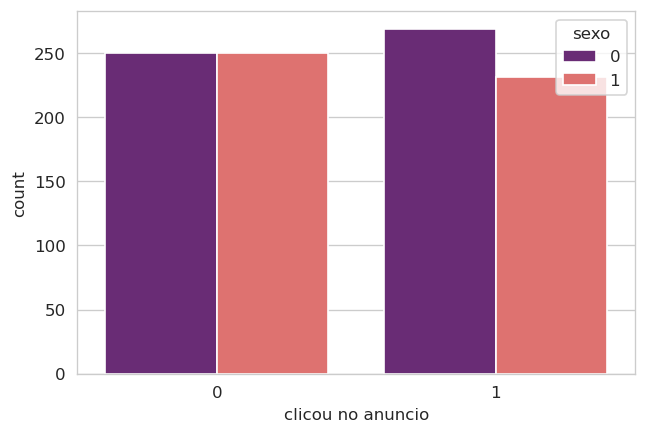

In [26]:
plt.figure(dpi=120)
plt.ylabel("Quantidade")
sns.countplot(data=df, x='clicou no anuncio',hue='sexo',palette="magma")
plt.show()


***


# Eliminando colunas desnecessárias

In [27]:
df.drop(['titulo do anuncio','cidade do cliente','nacionalidade','horario que saiu da internet'], axis=1, inplace=True)
df.head()

,minutos no site,idade,renda anual,minutos de navegacao por dia,sexo,clicou no anuncio
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


***
# Tendo uma visão geral de como os dados se relacionam baseado em quem clicou no anúncio ou não

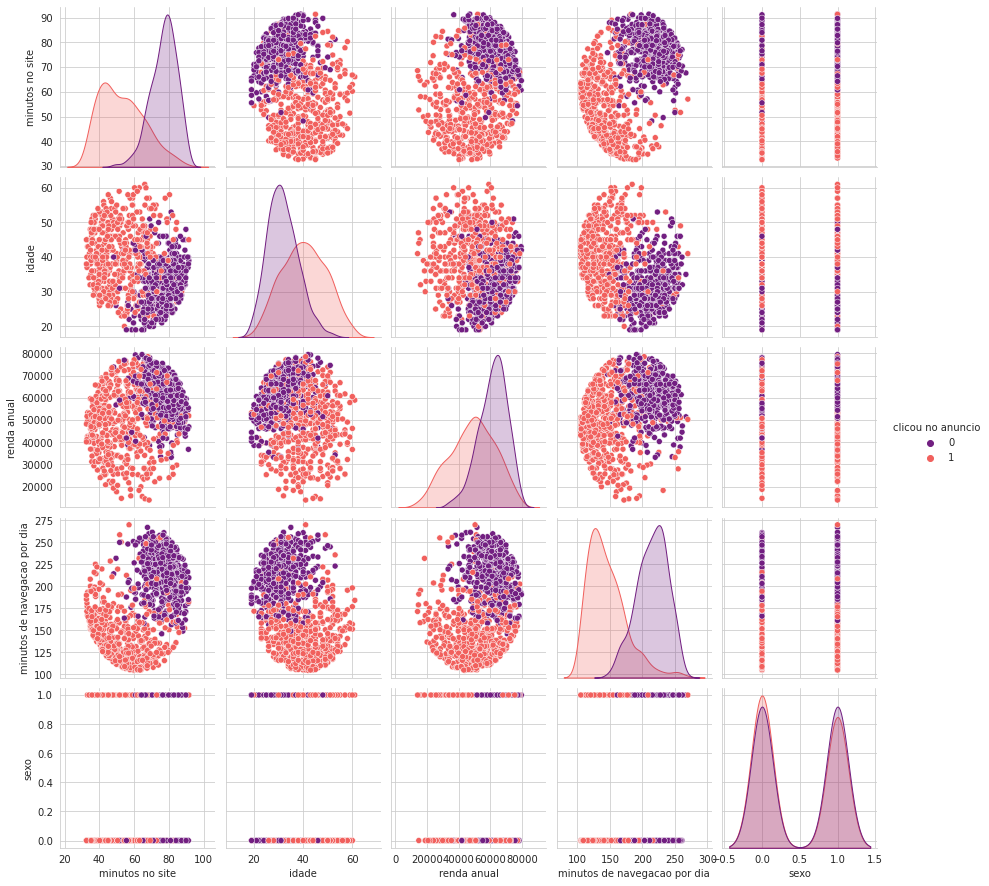

In [28]:
sns.pairplot(df, hue="clicou no anuncio", palette="magma")


***
# Modelos escolhidos: Logistic Regression, Random Forest, SVC, Gradient Boosting e KNN

Por se tratar de um problema de classificação, foi escolhido essas duas opções, apesar de também existir mais alternativas para este tipo de problema, agora é hora de quebrar os dados em treino e teste e fitar os modelos.


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [30]:
X = df.iloc[:,:-1]
y = df['clicou no anuncio']

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=101)

## Instanciando modelos

In [32]:
logmodel = LogisticRegression()
rfmodel = RandomForestRegressor()
svcmodel = SVC()
gradmodel = GradientBoostingClassifier()
knnmodel = KNeighborsClassifier()

## Treino

In [33]:
logmodel.fit(Xtrain, ytrain)
rfmodel.fit(Xtrain, ytrain)
svcmodel.fit(Xtrain, ytrain)
gradmodel.fit(Xtrain, ytrain)
knnmodel.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [35]:
logpredi = logmodel.predict(Xtest)
rfpredi = rfmodel.predict(Xtest)
svcpredi = svcmodel.predict(Xtest)
gradpredi = gradmodel.predict(Xtest)
knnpredi = knnmodel.predict(Xtest)

## Verificando score do modelo

In [36]:
logscore = logmodel.score(Xtest, ytest)*100
rfscore = rfmodel.score(Xtest, ytest)*100
svcscore = svcmodel.score(Xtest, ytest)*100
gradscore = gradmodel.score(Xtest, ytest)*100
knnscore = knnmodel.score(Xtest, ytest)*100

scores = [logscore, rfscore, svcscore, gradscore, knnscore]


scores = pd.DataFrame({
    "Modelos":"Logistic_Regression Random_Forest SVC Gradient_Boosting KNN".split(),
    "Score":scores
}).sort_values(by="Score", ascending=False)

scores

,Modelos,Score
3,Gradient_Boosting,95.000000
0,Logistic_Regression,92.666667
1,Random_Forest,83.319139
2,SVC,73.000000
4,KNN,72.000000


## Visualizando Margem de erros dos modelos com melhor score


Text(0.5, 0, 'Margem de erro')

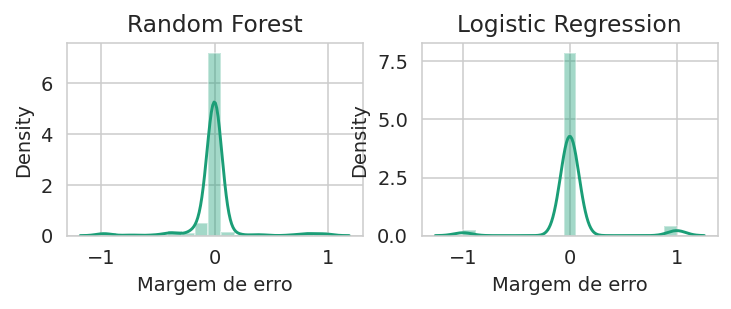

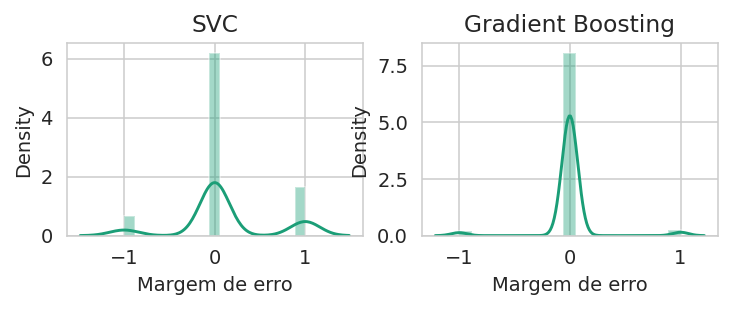

In [41]:
plt.figure(dpi=140)
plt.subplot(2,2,1)
plt.title("Random Forest")
sns.distplot(ytest - rfpredi)
plt.xlabel("Margem de erro")
#
plt.subplot(2,2,2)
plt.title("Logistic Regression")
sns.distplot(ytest - logpredi)
plt.xlabel("Margem de erro")
#
plt.figure(dpi=140)
plt.subplot(2,2,3)
plt.title("SVC")
sns.distplot(ytest - svcpredi)
plt.xlabel("Margem de erro")
#
plt.subplot(2,2,4)
plt.title("Gradient Boosting")
sns.distplot(ytest - gradpredi)
plt.xlabel("Margem de erro")

***
## Visualizando Métricas gerais dos dois modelos que performaram melhor

In [63]:
perfgrad = classification_report(ytest, gradpredi)
perflog = classification_report(ytest, logpredi)
print(f"________________ Gradient Boosting _________________\n\n{perfgrad}\n\n\n________________ Logistic Regression _________________\n\n{perflog}")

________________ Gradient Boosting _________________

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       157
           1       0.95      0.94      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



________________ Logistic Regression _________________

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



***
# Conclusão:
Tanto o modelo Logistic Regression quanto o Gradient Boosting obtiveram performances acima dos outros, mas o Gradient Boosting se mostrou o melhor para este caso